In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=None,fileName=None):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook,scheduler=scheduler)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    if fileName != None:
        errorFile = fileName + "_error.pdf"
        accFile = fileName + "_acc.pdf"
        fig_1.tight_layout() # This minimises whitespace around the axes. 
        fig_1.savefig(errorFile)
        fig_2.tight_layout() # This minimises whitespace around the axes. 
        fig_2.savefig(accFile)
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fca39ae3588>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fca546f9400>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fca46517c88>)


learning_rate 0.015
epoch 1


Epoch 1: 2.8s to complete
    error(train)=1.82e+00, acc(train)=5.02e-01, error(valid)=1.84e+00, acc(valid)=4.91e-01


learning_rate 0.01499722440205724
epoch 2


Epoch 2: 2.8s to complete
    error(train)=1.32e+00, acc(train)=6.25e-01, error(valid)=1.35e+00, acc(valid)=6.12e-01


learning_rate 0.014988900347409026
epoch 3


Epoch 3: 3.2s to complete
    error(train)=1.15e+00, acc(train)=6.70e-01, error(valid)=1.18e+00, acc(valid)=6.56e-01


learning_rate 0.014975036050892324
epoch 4


Epoch 4: 3.2s to complete
    error(train)=1.03e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.88e-01


learning_rate 0.014955645194893938
epoch 5


Epoch 5: 3.2s to complete
    error(train)=9.27e-01, acc(train)=7.26e-01, error(valid)=9.66e-01, acc(valid)=7.14e-01


learning_rate 0.01493074691584765
epoch 6


Epoch 6: 3.8s to complete
    error(train)=8.68e-01, acc(train)=7.43e-01, error(valid)=9.12e-01, acc(valid)=7.27e-01


learning_rate 0.014900365785348875
epoch 7


Epoch 7: 2.8s to complete
    error(train)=8.02e-01, acc(train)=7.58e-01, error(valid)=8.45e-01, acc(valid)=7.42e-01


learning_rate 0.014864531785905454
epoch 8


Epoch 8: 2.8s to complete
    error(train)=7.60e-01, acc(train)=7.70e-01, error(valid)=8.09e-01, acc(valid)=7.56e-01


learning_rate 0.01482328028134855
epoch 9


Epoch 9: 2.8s to complete
    error(train)=7.31e-01, acc(train)=7.77e-01, error(valid)=7.83e-01, acc(valid)=7.61e-01


learning_rate 0.014776651981932804
epoch 10


Epoch 10: 2.8s to complete
    error(train)=6.93e-01, acc(train)=7.86e-01, error(valid)=7.49e-01, acc(valid)=7.67e-01


learning_rate 0.014724692904160239
epoch 11


Epoch 11: 2.8s to complete
    error(train)=6.62e-01, acc(train)=7.95e-01, error(valid)=7.22e-01, acc(valid)=7.77e-01


learning_rate 0.014667454325367518
epoch 12


Epoch 12: 2.8s to complete
    error(train)=6.39e-01, acc(train)=8.01e-01, error(valid)=7.02e-01, acc(valid)=7.83e-01


learning_rate 0.014604992733121413
epoch 13


Epoch 13: 2.8s to complete
    error(train)=6.17e-01, acc(train)=8.07e-01, error(valid)=6.82e-01, acc(valid)=7.87e-01


learning_rate 0.014537369769472393
epoch 14


Epoch 14: 2.8s to complete
    error(train)=6.01e-01, acc(train)=8.10e-01, error(valid)=6.71e-01, acc(valid)=7.89e-01


learning_rate 0.01446465217012136
epoch 15


Epoch 15: 2.8s to complete
    error(train)=5.82e-01, acc(train)=8.16e-01, error(valid)=6.52e-01, acc(valid)=7.95e-01


learning_rate 0.014386911698559568
epoch 16


Epoch 16: 2.8s to complete
    error(train)=5.68e-01, acc(train)=8.18e-01, error(valid)=6.44e-01, acc(valid)=7.95e-01


learning_rate 0.014304225075246731
epoch 17


Epoch 17: 2.8s to complete
    error(train)=5.56e-01, acc(train)=8.22e-01, error(valid)=6.35e-01, acc(valid)=7.99e-01


learning_rate 0.014216673901897183
epoch 18


Epoch 18: 2.8s to complete
    error(train)=5.42e-01, acc(train)=8.26e-01, error(valid)=6.24e-01, acc(valid)=8.02e-01


learning_rate 0.014124344580948835
epoch 19


Epoch 19: 2.8s to complete
    error(train)=5.30e-01, acc(train)=8.32e-01, error(valid)=6.15e-01, acc(valid)=8.06e-01


learning_rate 0.014027328230294409
epoch 20


Epoch 20: 2.9s to complete
    error(train)=5.24e-01, acc(train)=8.30e-01, error(valid)=6.13e-01, acc(valid)=8.04e-01


learning_rate 0.01392572059335908
epoch 21


Epoch 21: 2.8s to complete
    error(train)=5.14e-01, acc(train)=8.31e-01, error(valid)=6.06e-01, acc(valid)=8.02e-01


learning_rate 0.013819621944613258
epoch 22


Epoch 22: 2.8s to complete
    error(train)=5.15e-01, acc(train)=8.32e-01, error(valid)=6.09e-01, acc(valid)=8.04e-01


learning_rate 0.013709136990613813
epoch 23


Epoch 23: 2.8s to complete
    error(train)=4.98e-01, acc(train)=8.38e-01, error(valid)=5.95e-01, acc(valid)=8.11e-01


learning_rate 0.013594374766671335
epoch 24


Epoch 24: 2.8s to complete
    error(train)=4.90e-01, acc(train)=8.40e-01, error(valid)=5.88e-01, acc(valid)=8.09e-01


learning_rate 0.01347544852924544
epoch 25


Epoch 25: 2.8s to complete
    error(train)=4.77e-01, acc(train)=8.43e-01, error(valid)=5.84e-01, acc(valid)=8.12e-01


learning_rate 0.01335247564417433
epoch 26


Epoch 26: 2.8s to complete
    error(train)=4.80e-01, acc(train)=8.43e-01, error(valid)=5.83e-01, acc(valid)=8.10e-01


learning_rate 0.013225577470848874
epoch 27


Epoch 27: 2.8s to complete
    error(train)=4.65e-01, acc(train)=8.48e-01, error(valid)=5.75e-01, acc(valid)=8.16e-01


learning_rate 0.013094879242445541
epoch 28


Epoch 28: 2.8s to complete
    error(train)=4.61e-01, acc(train)=8.48e-01, error(valid)=5.73e-01, acc(valid)=8.16e-01


learning_rate 0.01296050994233638
epoch 29


Epoch 29: 2.8s to complete
    error(train)=4.58e-01, acc(train)=8.48e-01, error(valid)=5.71e-01, acc(valid)=8.15e-01


learning_rate 0.012822602176797994
epoch 30


Epoch 30: 2.8s to complete
    error(train)=4.49e-01, acc(train)=8.52e-01, error(valid)=5.64e-01, acc(valid)=8.16e-01


learning_rate 0.012681292044145162
epoch 31


Epoch 31: 2.9s to complete
    error(train)=4.49e-01, acc(train)=8.51e-01, error(valid)=5.67e-01, acc(valid)=8.15e-01


learning_rate 0.012536719000418235
epoch 32


Epoch 32: 2.9s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=5.58e-01, acc(valid)=8.19e-01


learning_rate 0.012389025721756855
epoch 33


Epoch 33: 2.9s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=5.59e-01, acc(valid)=8.18e-01


learning_rate 0.012238357963595839
epoch 34


Epoch 34: 2.8s to complete
    error(train)=4.27e-01, acc(train)=8.58e-01, error(valid)=5.54e-01, acc(valid)=8.18e-01


learning_rate 0.012084864416822147
epoch 35


Epoch 35: 2.8s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=5.56e-01, acc(valid)=8.20e-01


learning_rate 0.01192869656103495
epoch 36


Epoch 36: 2.8s to complete
    error(train)=4.25e-01, acc(train)=8.58e-01, error(valid)=5.55e-01, acc(valid)=8.19e-01


learning_rate 0.011770008515053533
epoch 37


Epoch 37: 2.8s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.50e-01, acc(valid)=8.21e-01


learning_rate 0.01160895688482064
epoch 38


Epoch 38: 2.9s to complete
    error(train)=4.24e-01, acc(train)=8.57e-01, error(valid)=5.64e-01, acc(valid)=8.18e-01


learning_rate 0.011445700608851314
epoch 39


Epoch 39: 2.8s to complete
    error(train)=4.14e-01, acc(train)=8.61e-01, error(valid)=5.53e-01, acc(valid)=8.21e-01


learning_rate 0.011280400801379764
epoch 40


Epoch 40: 2.9s to complete
    error(train)=4.05e-01, acc(train)=8.65e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


learning_rate 0.011113220593359079
epoch 41


Epoch 41: 2.9s to complete
    error(train)=4.03e-01, acc(train)=8.64e-01, error(valid)=5.44e-01, acc(valid)=8.22e-01


learning_rate 0.010944324971470666
epoch 42


Epoch 42: 2.8s to complete
    error(train)=4.03e-01, acc(train)=8.64e-01, error(valid)=5.49e-01, acc(valid)=8.22e-01


learning_rate 0.010773880615302309
epoch 43


Epoch 43: 2.9s to complete
    error(train)=4.01e-01, acc(train)=8.65e-01, error(valid)=5.52e-01, acc(valid)=8.25e-01


learning_rate 0.010602055732855553
epoch 44


Epoch 44: 2.9s to complete
    error(train)=3.93e-01, acc(train)=8.67e-01, error(valid)=5.44e-01, acc(valid)=8.25e-01


learning_rate 0.010429019894544702
epoch 45


Epoch 45: 2.9s to complete
    error(train)=3.91e-01, acc(train)=8.67e-01, error(valid)=5.42e-01, acc(valid)=8.25e-01


learning_rate 0.0102549438658513
epoch 46


Epoch 46: 2.9s to complete
    error(train)=3.88e-01, acc(train)=8.70e-01, error(valid)=5.41e-01, acc(valid)=8.24e-01


learning_rate 0.010079999438799211
epoch 47


Epoch 47: 2.9s to complete
    error(train)=3.84e-01, acc(train)=8.71e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


learning_rate 0.009904359262416644
epoch 48


Epoch 48: 2.8s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.38e-01, acc(valid)=8.23e-01


learning_rate 0.009728196672352387
epoch 49


Epoch 49: 2.9s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.40e-01, acc(valid)=8.27e-01


learning_rate 0.009551685519814472
epoch 50


Epoch 50: 2.9s to complete
    error(train)=3.80e-01, acc(train)=8.72e-01, error(valid)=5.40e-01, acc(valid)=8.24e-01


learning_rate 0.009375
epoch 51


Epoch 51: 2.8s to complete
    error(train)=3.76e-01, acc(train)=8.73e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


learning_rate 0.009198314480185528
epoch 52


Epoch 52: 2.8s to complete
    error(train)=3.71e-01, acc(train)=8.74e-01, error(valid)=5.37e-01, acc(valid)=8.25e-01


learning_rate 0.009021803327647612
epoch 53


Epoch 53: 2.8s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=5.39e-01, acc(valid)=8.24e-01


learning_rate 0.008845640737583357
epoch 54


Epoch 54: 2.9s to complete
    error(train)=3.71e-01, acc(train)=8.74e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


learning_rate 0.008670000561200788
epoch 55


Epoch 55: 2.8s to complete
    error(train)=3.68e-01, acc(train)=8.75e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


learning_rate 0.0084950561341487
epoch 56


Epoch 56: 2.8s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=5.39e-01, acc(valid)=8.26e-01


learning_rate 0.008320980105455298
epoch 57


Epoch 57: 2.8s to complete
    error(train)=3.64e-01, acc(train)=8.77e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


learning_rate 0.00814794426714445
epoch 58


Epoch 58: 2.9s to complete
    error(train)=3.62e-01, acc(train)=8.77e-01, error(valid)=5.40e-01, acc(valid)=8.25e-01


learning_rate 0.007976119384697692
epoch 59


Epoch 59: 2.8s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


learning_rate 0.007805675028529336
epoch 60


Epoch 60: 2.8s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=5.36e-01, acc(valid)=8.24e-01


learning_rate 0.00763677940664092
epoch 61


Epoch 61: 2.8s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=5.34e-01, acc(valid)=8.26e-01


learning_rate 0.007469599198620235
epoch 62


Epoch 62: 2.9s to complete
    error(train)=3.51e-01, acc(train)=8.81e-01, error(valid)=5.34e-01, acc(valid)=8.25e-01


learning_rate 0.0073042993911486866
epoch 63


Epoch 63: 2.8s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


learning_rate 0.007141043115179359
epoch 64


Epoch 64: 2.8s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


learning_rate 0.006979991484946466
epoch 65


Epoch 65: 2.8s to complete
    error(train)=3.52e-01, acc(train)=8.80e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


learning_rate 0.006821303438965049
epoch 66


Epoch 66: 2.8s to complete
    error(train)=3.48e-01, acc(train)=8.81e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


learning_rate 0.006665135583177851
epoch 67


Epoch 67: 2.8s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=5.33e-01, acc(valid)=8.24e-01


learning_rate 0.006511642036404161
epoch 68


Epoch 68: 2.8s to complete
    error(train)=3.44e-01, acc(train)=8.83e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


learning_rate 0.006360974278243142
epoch 69


Epoch 69: 2.8s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


learning_rate 0.006213280999581766
epoch 70


Epoch 70: 2.8s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.33e-01, acc(valid)=8.27e-01


learning_rate 0.006068707955854839
epoch 71


Epoch 71: 2.9s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=5.40e-01, acc(valid)=8.29e-01


learning_rate 0.005927397823202008
epoch 72


Epoch 72: 2.8s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


learning_rate 0.00578949005766362
epoch 73


Epoch 73: 2.8s to complete
    error(train)=3.38e-01, acc(train)=8.84e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


learning_rate 0.005655120757554459
epoch 74


Epoch 74: 2.9s to complete
    error(train)=3.34e-01, acc(train)=8.87e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


learning_rate 0.005524422529151126
epoch 75


Epoch 75: 3.2s to complete
    error(train)=3.36e-01, acc(train)=8.85e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


learning_rate 0.00539752435582567
epoch 76


Epoch 76: 3.3s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


learning_rate 0.005274551470754561
epoch 77


Epoch 77: 3.4s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


learning_rate 0.005155625233328664
epoch 78


Epoch 78: 3.3s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


learning_rate 0.005040863009386186
epoch 79


Epoch 79: 3.4s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.38e-01, acc(valid)=8.27e-01


learning_rate 0.004930378055386741
epoch 80


Epoch 80: 2.9s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


learning_rate 0.004824279406640921
epoch 81


Epoch 81: 2.9s to complete
    error(train)=3.32e-01, acc(train)=8.86e-01, error(valid)=5.38e-01, acc(valid)=8.30e-01


learning_rate 0.004722671769705589
epoch 82


Epoch 82: 2.9s to complete
    error(train)=3.27e-01, acc(train)=8.88e-01, error(valid)=5.35e-01, acc(valid)=8.27e-01


learning_rate 0.004625655419051166
epoch 83


Epoch 83: 2.9s to complete
    error(train)=3.27e-01, acc(train)=8.88e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


learning_rate 0.004533326098102817
epoch 84


Epoch 84: 2.8s to complete
    error(train)=3.27e-01, acc(train)=8.88e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


learning_rate 0.004445774924753268
epoch 85


Epoch 85: 2.9s to complete
    error(train)=3.23e-01, acc(train)=8.90e-01, error(valid)=5.33e-01, acc(valid)=8.31e-01


learning_rate 0.004363088301440431
epoch 86


Epoch 86: 2.9s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=5.39e-01, acc(valid)=8.30e-01


learning_rate 0.004285347829878641
epoch 87


Epoch 87: 2.8s to complete
    error(train)=3.24e-01, acc(train)=8.88e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01


learning_rate 0.004212630230527606
epoch 88


Epoch 88: 2.9s to complete
    error(train)=3.23e-01, acc(train)=8.88e-01, error(valid)=5.36e-01, acc(valid)=8.30e-01


learning_rate 0.004145007266878586
epoch 89


Epoch 89: 2.9s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


learning_rate 0.004082545674632482
epoch 90


Epoch 90: 2.8s to complete
    error(train)=3.21e-01, acc(train)=8.89e-01, error(valid)=5.35e-01, acc(valid)=8.29e-01


learning_rate 0.004025307095839761
epoch 91


Epoch 91: 2.8s to complete
    error(train)=3.22e-01, acc(train)=8.90e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


learning_rate 0.003973348018067195
epoch 92


Epoch 92: 2.9s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


learning_rate 0.00392671971865145
epoch 93


Epoch 93: 2.8s to complete
    error(train)=3.20e-01, acc(train)=8.90e-01, error(valid)=5.38e-01, acc(valid)=8.29e-01


learning_rate 0.0038854682140945455
epoch 94


Epoch 94: 2.8s to complete
    error(train)=3.18e-01, acc(train)=8.91e-01, error(valid)=5.37e-01, acc(valid)=8.29e-01


learning_rate 0.0038496342146511265
epoch 95


Epoch 95: 2.8s to complete
    error(train)=3.18e-01, acc(train)=8.90e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


learning_rate 0.0038192530841523503
epoch 96


Epoch 96: 2.9s to complete
    error(train)=3.17e-01, acc(train)=8.92e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


learning_rate 0.0037943548051060623
epoch 97


Epoch 97: 2.9s to complete
    error(train)=3.16e-01, acc(train)=8.92e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


learning_rate 0.003774963949107675
epoch 98


Epoch 98: 2.9s to complete
    error(train)=3.15e-01, acc(train)=8.92e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


learning_rate 0.0037610996525909725
epoch 99


Epoch 99: 2.8s to complete
    error(train)=3.16e-01, acc(train)=8.92e-01, error(valid)=5.38e-01, acc(valid)=8.29e-01


learning_rate 0.0037527755979427594
epoch 100


Epoch 100: 2.8s to complete
    error(train)=3.15e-01, acc(train)=8.92e-01, error(valid)=5.39e-01, acc(valid)=8.30e-01


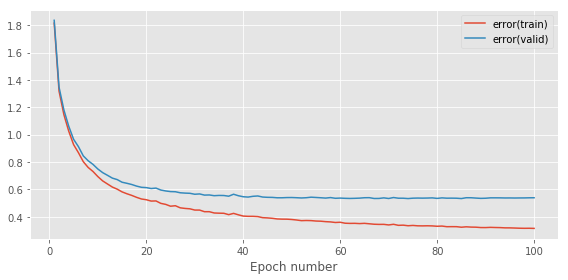

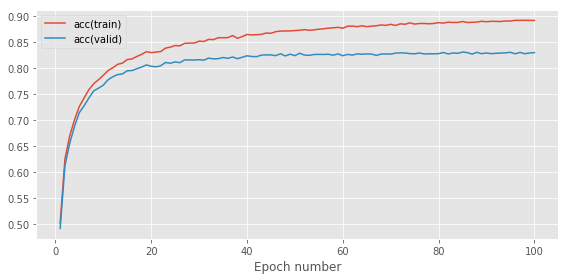

In [3]:
##############SGD With scheduler with no restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 0.0075
learning_range = 2
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

sgd_scheduler_no_restart = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=100,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=1.0)

error = CrossEntropySoftmaxError()

# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,scheduler=sgd_scheduler_no_restart,fileName='cw4_3_SGD_no_restart_{}'.format(learning_rate))

learning_rate 0.015
epoch 1


Epoch 1: 2.9s to complete
    error(train)=1.72e+00, acc(train)=5.28e-01, error(valid)=1.75e+00, acc(valid)=5.17e-01


learning_rate 0.014955645194893938
epoch 2


Epoch 2: 2.8s to complete
    error(train)=1.29e+00, acc(train)=6.33e-01, error(valid)=1.32e+00, acc(valid)=6.17e-01


learning_rate 0.01482328028134855
epoch 3


Epoch 3: 2.8s to complete
    error(train)=1.12e+00, acc(train)=6.80e-01, error(valid)=1.15e+00, acc(valid)=6.62e-01


learning_rate 0.014604992733121413
epoch 4


Epoch 4: 2.8s to complete
    error(train)=1.00e+00, acc(train)=7.08e-01, error(valid)=1.04e+00, acc(valid)=6.96e-01


learning_rate 0.014304225075246731
epoch 5


Epoch 5: 2.8s to complete
    error(train)=9.10e-01, acc(train)=7.31e-01, error(valid)=9.51e-01, acc(valid)=7.11e-01


learning_rate 0.01392572059335908
epoch 6


Epoch 6: 2.8s to complete
    error(train)=8.54e-01, acc(train)=7.43e-01, error(valid)=8.97e-01, acc(valid)=7.24e-01


learning_rate 0.01347544852924544
epoch 7


Epoch 7: 2.8s to complete
    error(train)=8.04e-01, acc(train)=7.57e-01, error(valid)=8.53e-01, acc(valid)=7.37e-01


learning_rate 0.01296050994233638
epoch 8


Epoch 8: 2.8s to complete
    error(train)=7.62e-01, acc(train)=7.69e-01, error(valid)=8.13e-01, acc(valid)=7.48e-01


learning_rate 0.012389025721756855
epoch 9


Epoch 9: 2.8s to complete
    error(train)=7.27e-01, acc(train)=7.79e-01, error(valid)=7.78e-01, acc(valid)=7.60e-01


learning_rate 0.011770008515053533
epoch 10


Epoch 10: 2.8s to complete
    error(train)=7.00e-01, acc(train)=7.86e-01, error(valid)=7.55e-01, acc(valid)=7.65e-01


learning_rate 0.011113220593359079
epoch 11


Epoch 11: 2.9s to complete
    error(train)=6.85e-01, acc(train)=7.87e-01, error(valid)=7.41e-01, acc(valid)=7.69e-01


learning_rate 0.010429019894544702
epoch 12


Epoch 12: 2.8s to complete
    error(train)=6.62e-01, acc(train)=7.95e-01, error(valid)=7.23e-01, acc(valid)=7.74e-01


learning_rate 0.009728196672352387
epoch 13


Epoch 13: 2.8s to complete
    error(train)=6.42e-01, acc(train)=8.01e-01, error(valid)=7.06e-01, acc(valid)=7.80e-01


learning_rate 0.009021803327647612
epoch 14


Epoch 14: 2.9s to complete
    error(train)=6.30e-01, acc(train)=8.05e-01, error(valid)=6.96e-01, acc(valid)=7.80e-01


learning_rate 0.008320980105455298
epoch 15


Epoch 15: 2.9s to complete
    error(train)=6.16e-01, acc(train)=8.08e-01, error(valid)=6.83e-01, acc(valid)=7.88e-01


learning_rate 0.00763677940664092
epoch 16


Epoch 16: 2.8s to complete
    error(train)=6.04e-01, acc(train)=8.10e-01, error(valid)=6.73e-01, acc(valid)=7.88e-01


learning_rate 0.006979991484946466
epoch 17


Epoch 17: 2.8s to complete
    error(train)=5.94e-01, acc(train)=8.13e-01, error(valid)=6.65e-01, acc(valid)=7.89e-01


learning_rate 0.006360974278243142
epoch 18


Epoch 18: 2.8s to complete
    error(train)=5.88e-01, acc(train)=8.15e-01, error(valid)=6.60e-01, acc(valid)=7.91e-01


learning_rate 0.00578949005766362
epoch 19


Epoch 19: 3.0s to complete
    error(train)=5.79e-01, acc(train)=8.17e-01, error(valid)=6.52e-01, acc(valid)=7.96e-01


learning_rate 0.005274551470754561
epoch 20


Epoch 20: 2.9s to complete
    error(train)=5.75e-01, acc(train)=8.18e-01, error(valid)=6.47e-01, acc(valid)=7.94e-01


learning_rate 0.004824279406640921
epoch 21


Epoch 21: 2.8s to complete
    error(train)=5.70e-01, acc(train)=8.20e-01, error(valid)=6.47e-01, acc(valid)=7.96e-01


learning_rate 0.004445774924753268
epoch 22


Epoch 22: 2.8s to complete
    error(train)=5.65e-01, acc(train)=8.21e-01, error(valid)=6.42e-01, acc(valid)=7.95e-01


learning_rate 0.004145007266878586
epoch 23


Epoch 23: 2.9s to complete
    error(train)=5.58e-01, acc(train)=8.24e-01, error(valid)=6.34e-01, acc(valid)=7.98e-01


learning_rate 0.00392671971865145
epoch 24


Epoch 24: 2.9s to complete
    error(train)=5.55e-01, acc(train)=8.24e-01, error(valid)=6.34e-01, acc(valid)=7.99e-01


learning_rate 0.0037943548051060623
epoch 25


Epoch 25: 2.9s to complete
    error(train)=5.50e-01, acc(train)=8.26e-01, error(valid)=6.28e-01, acc(valid)=8.01e-01


learning_rate 0.0135
epoch 26


Epoch 26: 3.0s to complete
    error(train)=5.51e-01, acc(train)=8.22e-01, error(valid)=6.31e-01, acc(valid)=7.98e-01


learning_rate 0.013495723796731935
epoch 27


Epoch 27: 2.8s to complete
    error(train)=5.39e-01, acc(train)=8.27e-01, error(valid)=6.21e-01, acc(valid)=8.00e-01


learning_rate 0.013482902688841334
epoch 28


Epoch 28: 2.9s to complete
    error(train)=5.39e-01, acc(train)=8.24e-01, error(valid)=6.24e-01, acc(valid)=7.97e-01


learning_rate 0.01346155916890808
epoch 29


Epoch 29: 2.9s to complete
    error(train)=5.31e-01, acc(train)=8.29e-01, error(valid)=6.23e-01, acc(valid)=8.01e-01


learning_rate 0.013431730680718712
epoch 30


Epoch 30: 2.9s to complete
    error(train)=5.11e-01, acc(train)=8.35e-01, error(valid)=6.02e-01, acc(valid)=8.07e-01


learning_rate 0.013393469553577302
epoch 31


Epoch 31: 2.9s to complete
    error(train)=5.07e-01, acc(train)=8.35e-01, error(valid)=6.02e-01, acc(valid)=8.06e-01


learning_rate 0.013346842910502076
epoch 32


Epoch 32: 2.9s to complete
    error(train)=5.00e-01, acc(train)=8.35e-01, error(valid)=5.98e-01, acc(valid)=8.03e-01


learning_rate 0.013291932550468828
epoch 33


Epoch 33: 2.9s to complete
    error(train)=4.87e-01, acc(train)=8.40e-01, error(valid)=5.87e-01, acc(valid)=8.08e-01


learning_rate 0.01322883480490772
epoch 34


Epoch 34: 2.9s to complete
    error(train)=4.86e-01, acc(train)=8.40e-01, error(valid)=5.87e-01, acc(valid)=8.11e-01


learning_rate 0.013157660368705226
epoch 35


Epoch 35: 2.9s to complete
    error(train)=4.72e-01, acc(train)=8.44e-01, error(valid)=5.76e-01, acc(valid)=8.12e-01


learning_rate 0.01307853410600768
epoch 36


Epoch 36: 2.9s to complete
    error(train)=4.74e-01, acc(train)=8.43e-01, error(valid)=5.80e-01, acc(valid)=8.12e-01


learning_rate 0.012991594831167137
epoch 37


Epoch 37: 2.9s to complete
    error(train)=4.69e-01, acc(train)=8.43e-01, error(valid)=5.78e-01, acc(valid)=8.12e-01


learning_rate 0.012896995065213834
epoch 38


Epoch 38: 2.9s to complete
    error(train)=4.61e-01, acc(train)=8.48e-01, error(valid)=5.71e-01, acc(valid)=8.14e-01


learning_rate 0.01279490076828247
epoch 39


Epoch 39: 2.9s to complete
    error(train)=4.48e-01, acc(train)=8.51e-01, error(valid)=5.64e-01, acc(valid)=8.14e-01


learning_rate 0.012685491048461735
epoch 40


Epoch 40: 2.9s to complete
    error(train)=4.53e-01, acc(train)=8.49e-01, error(valid)=5.68e-01, acc(valid)=8.14e-01


learning_rate 0.01256895784757787
epoch 41


Epoch 41: 2.9s to complete
    error(train)=4.44e-01, acc(train)=8.51e-01, error(valid)=5.63e-01, acc(valid)=8.14e-01


learning_rate 0.01244550560446347
epoch 42


Epoch 42: 2.9s to complete
    error(train)=4.33e-01, acc(train)=8.56e-01, error(valid)=5.52e-01, acc(valid)=8.20e-01


learning_rate 0.012315350896302313
epoch 43


Epoch 43: 2.9s to complete
    error(train)=4.39e-01, acc(train)=8.53e-01, error(valid)=5.62e-01, acc(valid)=8.13e-01


learning_rate 0.012178722058679382
epoch 44


Epoch 44: 2.9s to complete
    error(train)=4.27e-01, acc(train)=8.57e-01, error(valid)=5.50e-01, acc(valid)=8.19e-01


learning_rate 0.012035858785002657
epoch 45


Epoch 45: 2.9s to complete
    error(train)=4.22e-01, acc(train)=8.58e-01, error(valid)=5.48e-01, acc(valid)=8.23e-01


learning_rate 0.011887011705999434
epoch 46


Epoch 46: 3.2s to complete
    error(train)=4.21e-01, acc(train)=8.59e-01, error(valid)=5.52e-01, acc(valid)=8.21e-01


learning_rate 0.011732441950024862
epoch 47


Epoch 47: 3.2s to complete
    error(train)=4.19e-01, acc(train)=8.59e-01, error(valid)=5.49e-01, acc(valid)=8.21e-01


learning_rate 0.011572420684954078
epoch 48


Epoch 48: 3.2s to complete
    error(train)=4.13e-01, acc(train)=8.60e-01, error(valid)=5.45e-01, acc(valid)=8.22e-01


learning_rate 0.011407228642461607
epoch 49


Epoch 49: 3.2s to complete
    error(train)=4.12e-01, acc(train)=8.61e-01, error(valid)=5.43e-01, acc(valid)=8.24e-01


learning_rate 0.011237155625522608
epoch 50


Epoch 50: 3.3s to complete
    error(train)=4.13e-01, acc(train)=8.59e-01, error(valid)=5.49e-01, acc(valid)=8.21e-01


learning_rate 0.0110625
epoch 51


Epoch 51: 2.9s to complete
    error(train)=4.06e-01, acc(train)=8.63e-01, error(valid)=5.49e-01, acc(valid)=8.21e-01


learning_rate 0.010883568171209326
epoch 52


Epoch 52: 2.9s to complete
    error(train)=4.02e-01, acc(train)=8.63e-01, error(valid)=5.45e-01, acc(valid)=8.22e-01


learning_rate 0.01070067404637973
epoch 53


Epoch 53: 2.9s to complete
    error(train)=4.00e-01, acc(train)=8.64e-01, error(valid)=5.44e-01, acc(valid)=8.22e-01


learning_rate 0.010514138483954001
epoch 54


Epoch 54: 2.9s to complete
    error(train)=3.93e-01, acc(train)=8.67e-01, error(valid)=5.36e-01, acc(valid)=8.26e-01


learning_rate 0.01032428873069385
epoch 55


Epoch 55: 2.9s to complete
    error(train)=3.91e-01, acc(train)=8.67e-01, error(valid)=5.38e-01, acc(valid)=8.24e-01


learning_rate 0.010131457847577869
epoch 56


Epoch 56: 2.9s to complete
    error(train)=3.89e-01, acc(train)=8.67e-01, error(valid)=5.36e-01, acc(valid)=8.26e-01


learning_rate 0.00993598412549942
epoch 57


Epoch 57: 2.9s to complete
    error(train)=3.90e-01, acc(train)=8.66e-01, error(valid)=5.38e-01, acc(valid)=8.23e-01


learning_rate 0.009738210491789447
epoch 58


Epoch 58: 2.9s to complete
    error(train)=3.82e-01, acc(train)=8.70e-01, error(valid)=5.33e-01, acc(valid)=8.24e-01


learning_rate 0.009538483908605408
epoch 59


Epoch 59: 2.8s to complete
    error(train)=3.83e-01, acc(train)=8.69e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


learning_rate 0.009337154764241757
epoch 60


Epoch 60: 2.9s to complete
    error(train)=3.80e-01, acc(train)=8.70e-01, error(valid)=5.35e-01, acc(valid)=8.24e-01


learning_rate 0.00913457625842981
epoch 61


Epoch 61: 2.9s to complete
    error(train)=3.82e-01, acc(train)=8.70e-01, error(valid)=5.38e-01, acc(valid)=8.26e-01


learning_rate 0.008931103782705403
epoch 62


Epoch 62: 2.9s to complete
    error(train)=3.75e-01, acc(train)=8.71e-01, error(valid)=5.33e-01, acc(valid)=8.25e-01


learning_rate 0.008727094296931366
epoch 63


Epoch 63: 2.9s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=5.28e-01, acc(valid)=8.26e-01


learning_rate 0.008522905703068635
epoch 64


Epoch 64: 2.9s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=5.33e-01, acc(valid)=8.27e-01


learning_rate 0.008318896217294598
epoch 65


Epoch 65: 2.9s to complete
    error(train)=3.69e-01, acc(train)=8.74e-01, error(valid)=5.33e-01, acc(valid)=8.27e-01


learning_rate 0.00811542374157019
epoch 66


Epoch 66: 2.9s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=5.31e-01, acc(valid)=8.26e-01


learning_rate 0.007912845235758244
epoch 67


Epoch 67: 2.9s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=5.24e-01, acc(valid)=8.28e-01


learning_rate 0.007711516091394591
epoch 68


Epoch 68: 2.9s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=5.27e-01, acc(valid)=8.28e-01


learning_rate 0.007511789508210553
epoch 69


Epoch 69: 2.9s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


learning_rate 0.00731401587450058
epoch 70


Epoch 70: 2.9s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


learning_rate 0.007118542152422132
epoch 71


Epoch 71: 2.9s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


learning_rate 0.006925711269306151
epoch 72


Epoch 72: 2.9s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


learning_rate 0.006735861516045999
epoch 73


Epoch 73: 2.9s to complete
    error(train)=3.52e-01, acc(train)=8.79e-01, error(valid)=5.24e-01, acc(valid)=8.29e-01


learning_rate 0.006549325953620271
epoch 74


Epoch 74: 2.9s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


learning_rate 0.0063664318287906755
epoch 75


Epoch 75: 2.9s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


learning_rate 0.0061875
epoch 76


Epoch 76: 2.8s to complete
    error(train)=3.51e-01, acc(train)=8.80e-01, error(valid)=5.28e-01, acc(valid)=8.27e-01


learning_rate 0.00601284437447739
epoch 77


Epoch 77: 2.8s to complete
    error(train)=3.48e-01, acc(train)=8.81e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


learning_rate 0.005842771357538396
epoch 78


Epoch 78: 2.9s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


learning_rate 0.005677579315045923
epoch 79


Epoch 79: 2.8s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


learning_rate 0.005517558049975137
epoch 80


Epoch 80: 3.0s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01


learning_rate 0.005362988294000568
epoch 81


Epoch 81: 2.9s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=5.27e-01, acc(valid)=8.28e-01


learning_rate 0.005214141214997343
epoch 82


Epoch 82: 2.9s to complete
    error(train)=3.42e-01, acc(train)=8.82e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


learning_rate 0.0050712779413206194
epoch 83


Epoch 83: 2.9s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


learning_rate 0.004934649103697688
epoch 84


Epoch 84: 2.9s to complete
    error(train)=3.39e-01, acc(train)=8.83e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


learning_rate 0.004804494395536531
epoch 85


Epoch 85: 2.9s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=5.23e-01, acc(valid)=8.31e-01


learning_rate 0.004681042152422132
epoch 86


Epoch 86: 2.9s to complete
    error(train)=3.38e-01, acc(train)=8.83e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


learning_rate 0.004564508951538265
epoch 87


Epoch 87: 2.9s to complete
    error(train)=3.39e-01, acc(train)=8.83e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


learning_rate 0.00445509923171753
epoch 88


Epoch 88: 2.9s to complete
    error(train)=3.37e-01, acc(train)=8.84e-01, error(valid)=5.27e-01, acc(valid)=8.32e-01


learning_rate 0.004353004934786166
epoch 89


Epoch 89: 2.9s to complete
    error(train)=3.38e-01, acc(train)=8.82e-01, error(valid)=5.27e-01, acc(valid)=8.30e-01


learning_rate 0.0042584051688328625
epoch 90


Epoch 90: 2.9s to complete
    error(train)=3.33e-01, acc(train)=8.85e-01, error(valid)=5.23e-01, acc(valid)=8.30e-01


learning_rate 0.00417146589399232
epoch 91


Epoch 91: 2.9s to complete
    error(train)=3.32e-01, acc(train)=8.86e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


learning_rate 0.004092339631294775
epoch 92


Epoch 92: 2.9s to complete
    error(train)=3.32e-01, acc(train)=8.86e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


learning_rate 0.00402116519509228
epoch 93


Epoch 93: 2.9s to complete
    error(train)=3.31e-01, acc(train)=8.86e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


learning_rate 0.003958067449531172
epoch 94


Epoch 94: 2.9s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


learning_rate 0.0039031570894979234
epoch 95


Epoch 95: 2.9s to complete
    error(train)=3.30e-01, acc(train)=8.87e-01, error(valid)=5.22e-01, acc(valid)=8.31e-01


learning_rate 0.003856530446422697
epoch 96


Epoch 96: 2.9s to complete
    error(train)=3.29e-01, acc(train)=8.86e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


learning_rate 0.0038182693192812885
epoch 97


Epoch 97: 2.9s to complete
    error(train)=3.28e-01, acc(train)=8.87e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


learning_rate 0.0037884408310919207
epoch 98


Epoch 98: 2.9s to complete
    error(train)=3.27e-01, acc(train)=8.87e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


learning_rate 0.003767097311158666
epoch 99


Epoch 99: 2.9s to complete
    error(train)=3.29e-01, acc(train)=8.87e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


learning_rate 0.003754276203268065
epoch 100


Epoch 100: 2.9s to complete
    error(train)=3.27e-01, acc(train)=8.87e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


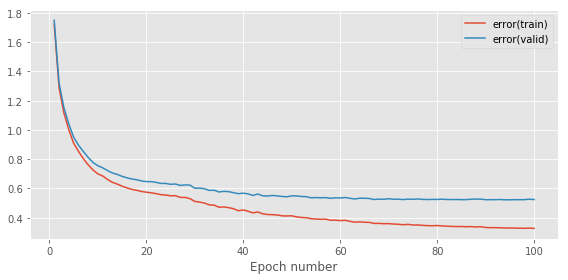

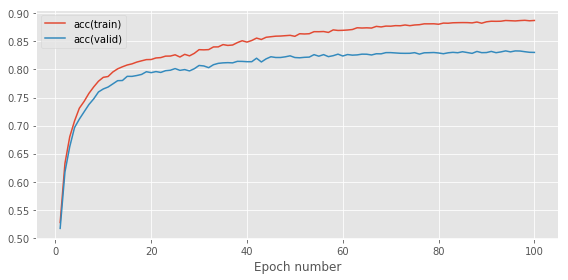

In [4]:
##############SGD With scheduler with special restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 0.0075
learning_range = 2
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

sgd_scheduler_special = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=25,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3.0)

error = CrossEntropySoftmaxError()

# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,scheduler=sgd_scheduler_special,fileName='cw4_3_SGD_special_restart_{}'.format(learning_rate))

learning_rate 0.000105
epoch 1


Epoch 1: 4.9s to complete
    error(train)=1.42e+00, acc(train)=6.09e-01, error(valid)=1.45e+00, acc(valid)=5.99e-01


learning_rate 0.00010499759154464226
epoch 2


Epoch 2: 4.3s to complete
    error(train)=1.17e+00, acc(train)=6.71e-01, error(valid)=1.20e+00, acc(valid)=6.60e-01


learning_rate 0.00010499036855542371
epoch 3


Epoch 3: 4.3s to complete
    error(train)=1.05e+00, acc(train)=6.99e-01, error(valid)=1.08e+00, acc(valid)=6.87e-01


learning_rate 0.00010497833816056266
epoch 4


Epoch 4: 4.4s to complete
    error(train)=9.61e-01, acc(train)=7.24e-01, error(valid)=9.97e-01, acc(valid)=7.09e-01


learning_rate 0.00010496151223260639
epoch 5


Epoch 5: 4.4s to complete
    error(train)=8.86e-01, acc(train)=7.42e-01, error(valid)=9.25e-01, acc(valid)=7.26e-01


learning_rate 0.00010493990737671437
epoch 6


Epoch 6: 4.4s to complete
    error(train)=8.39e-01, acc(train)=7.53e-01, error(valid)=8.84e-01, acc(valid)=7.36e-01


learning_rate 0.00010491354491427099
epoch 7


Epoch 7: 4.4s to complete
    error(train)=7.90e-01, acc(train)=7.65e-01, error(valid)=8.39e-01, acc(valid)=7.47e-01


learning_rate 0.00010488245086184389
epoch 8


Epoch 8: 4.5s to complete
    error(train)=7.50e-01, acc(train)=7.76e-01, error(valid)=8.03e-01, acc(valid)=7.58e-01


learning_rate 0.0001048466559055088
epoch 9


Epoch 9: 4.5s to complete
    error(train)=7.18e-01, acc(train)=7.84e-01, error(valid)=7.76e-01, acc(valid)=7.65e-01


learning_rate 0.00010480619537056604
epoch 10


Epoch 10: 4.5s to complete
    error(train)=6.92e-01, acc(train)=7.91e-01, error(valid)=7.53e-01, acc(valid)=7.70e-01


learning_rate 0.00010476110918667872
epoch 11


Epoch 11: 4.5s to complete
    error(train)=6.74e-01, acc(train)=7.95e-01, error(valid)=7.38e-01, acc(valid)=7.73e-01


learning_rate 0.00010471144184846706
epoch 12


Epoch 12: 4.5s to complete
    error(train)=6.53e-01, acc(train)=7.99e-01, error(valid)=7.19e-01, acc(valid)=7.80e-01


learning_rate 0.00010465724237159743
epoch 13


Epoch 13: 4.4s to complete
    error(train)=6.32e-01, acc(train)=8.06e-01, error(valid)=7.07e-01, acc(valid)=7.82e-01


learning_rate 0.0001045985642444099
epoch 14


Epoch 14: 4.5s to complete
    error(train)=6.18e-01, acc(train)=8.09e-01, error(valid)=6.94e-01, acc(valid)=7.86e-01


learning_rate 0.00010453546537513177
epoch 15


Epoch 15: 4.5s to complete
    error(train)=6.06e-01, acc(train)=8.13e-01, error(valid)=6.85e-01, acc(valid)=7.90e-01


learning_rate 0.00010446800803472895
epoch 16


Epoch 16: 4.5s to complete
    error(train)=5.90e-01, acc(train)=8.17e-01, error(valid)=6.72e-01, acc(valid)=7.92e-01


learning_rate 0.0001043962587954522
epoch 17


Epoch 17: 4.5s to complete
    error(train)=5.83e-01, acc(train)=8.17e-01, error(valid)=6.69e-01, acc(valid)=7.92e-01


learning_rate 0.0001043202884651383
epoch 18


Epoch 18: 4.5s to complete
    error(train)=5.67e-01, acc(train)=8.23e-01, error(valid)=6.56e-01, acc(valid)=7.96e-01


learning_rate 0.00010424017201733127
epoch 19


Epoch 19: 4.5s to complete
    error(train)=5.54e-01, acc(train)=8.27e-01, error(valid)=6.48e-01, acc(valid)=7.98e-01


learning_rate 0.00010415598851729251
epoch 20


Epoch 20: 4.5s to complete
    error(train)=5.46e-01, acc(train)=8.28e-01, error(valid)=6.42e-01, acc(valid)=8.00e-01


learning_rate 0.00010406782104397297
epoch 21


Epoch 21: 4.5s to complete
    error(train)=5.39e-01, acc(train)=8.30e-01, error(valid)=6.40e-01, acc(valid)=7.99e-01


learning_rate 0.0001039757566080242
epoch 22


Epoch 22: 4.4s to complete
    error(train)=5.34e-01, acc(train)=8.29e-01, error(valid)=6.36e-01, acc(valid)=7.99e-01


learning_rate 0.00010387988606592945
epoch 23


Epoch 23: 4.4s to complete
    error(train)=5.22e-01, acc(train)=8.34e-01, error(valid)=6.25e-01, acc(valid)=8.04e-01


learning_rate 0.00010378030403033915
epoch 24


Epoch 24: 4.5s to complete
    error(train)=5.17e-01, acc(train)=8.35e-01, error(valid)=6.25e-01, acc(valid)=8.01e-01


learning_rate 0.00010367710877669976
epoch 25


Epoch 25: 4.5s to complete
    error(train)=5.08e-01, acc(train)=8.38e-01, error(valid)=6.20e-01, acc(valid)=8.04e-01


learning_rate 0.00010357040214626767
epoch 26


Epoch 26: 4.5s to complete
    error(train)=4.99e-01, acc(train)=8.41e-01, error(valid)=6.13e-01, acc(valid)=8.05e-01


learning_rate 0.00010346028944560431
epoch 27


Epoch 27: 4.6s to complete
    error(train)=4.96e-01, acc(train)=8.40e-01, error(valid)=6.15e-01, acc(valid)=8.08e-01


learning_rate 0.00010334687934265117
epoch 28


Epoch 28: 4.5s to complete
    error(train)=4.89e-01, acc(train)=8.41e-01, error(valid)=6.07e-01, acc(valid)=8.08e-01


learning_rate 0.00010323028375948765
epoch 29


Epoch 29: 4.5s to complete
    error(train)=4.81e-01, acc(train)=8.45e-01, error(valid)=6.04e-01, acc(valid)=8.06e-01


learning_rate 0.00010311061776187763
epoch 30


Epoch 30: 4.5s to complete
    error(train)=4.78e-01, acc(train)=8.46e-01, error(valid)=6.03e-01, acc(valid)=8.09e-01


learning_rate 0.00010298799944571326
epoch 31


Epoch 31: 4.5s to complete
    error(train)=4.70e-01, acc(train)=8.49e-01, error(valid)=6.00e-01, acc(valid)=8.11e-01


learning_rate 0.00010286254982046874
epoch 32


Epoch 32: 4.7s to complete
    error(train)=4.65e-01, acc(train)=8.50e-01, error(valid)=5.97e-01, acc(valid)=8.10e-01


learning_rate 0.00010273439268977844
epoch 33


Epoch 33: 4.9s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=5.92e-01, acc(valid)=8.12e-01


learning_rate 0.00010260365452925777
epoch 34


Epoch 34: 4.9s to complete
    error(train)=4.55e-01, acc(train)=8.52e-01, error(valid)=5.88e-01, acc(valid)=8.12e-01


learning_rate 0.00010247046436168695
epoch 35


Epoch 35: 4.9s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=5.93e-01, acc(valid)=8.13e-01


learning_rate 0.00010233495362968112
epoch 36


Epoch 36: 4.9s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=5.86e-01, acc(valid)=8.11e-01


learning_rate 0.00010219725606597238
epoch 37


Epoch 37: 5.0s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=5.81e-01, acc(valid)=8.13e-01


learning_rate 0.00010205750756143167
epoch 38


Epoch 38: 4.8s to complete
    error(train)=4.38e-01, acc(train)=8.56e-01, error(valid)=5.83e-01, acc(valid)=8.14e-01


learning_rate 0.00010191584603096093
epoch 39


Epoch 39: 4.4s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=5.86e-01, acc(valid)=8.10e-01


learning_rate 0.00010177241127738773
epoch 40


Epoch 40: 4.6s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=5.81e-01, acc(valid)=8.15e-01


learning_rate 0.00010162734485349677
epoch 41


Epoch 41: 5.0s to complete
    error(train)=4.27e-01, acc(train)=8.59e-01, error(valid)=5.82e-01, acc(valid)=8.14e-01


learning_rate 0.00010148078992233434
epoch 42


Epoch 42: 5.0s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=5.85e-01, acc(valid)=8.11e-01


learning_rate 0.0001013328911159237
epoch 43


Epoch 43: 4.6s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.81e-01, acc(valid)=8.15e-01


learning_rate 0.00010118379439253074
epoch 44


Epoch 44: 4.5s to complete
    error(train)=4.13e-01, acc(train)=8.63e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


learning_rate 0.0001010336468926208
epoch 45


Epoch 45: 4.6s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


learning_rate 0.00010088259679364875
epoch 46


Epoch 46: 4.6s to complete
    error(train)=4.14e-01, acc(train)=8.62e-01, error(valid)=5.76e-01, acc(valid)=8.18e-01


learning_rate 0.00010073079316382578
epoch 47


Epoch 47: 4.6s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


learning_rate 0.00010057838581500704
epoch 48


Epoch 48: 4.6s to complete
    error(train)=4.04e-01, acc(train)=8.65e-01, error(valid)=5.76e-01, acc(valid)=8.12e-01


learning_rate 0.00010042552515484546
epoch 49


Epoch 49: 4.5s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=5.75e-01, acc(valid)=8.16e-01


learning_rate 0.00010027236203835754
epoch 50


Epoch 50: 4.5s to complete
    error(train)=3.94e-01, acc(train)=8.68e-01, error(valid)=5.69e-01, acc(valid)=8.19e-01


learning_rate 0.00010011904761904762
epoch 51


Epoch 51: 4.5s to complete
    error(train)=3.96e-01, acc(train)=8.66e-01, error(valid)=5.75e-01, acc(valid)=8.15e-01


learning_rate 9.996573319973771e-05
epoch 52


Epoch 52: 4.5s to complete
    error(train)=3.93e-01, acc(train)=8.68e-01, error(valid)=5.69e-01, acc(valid)=8.16e-01


learning_rate 9.981257008324978e-05
epoch 53


Epoch 53: 4.5s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


learning_rate 9.96597094230882e-05
epoch 54


Epoch 54: 4.5s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=5.69e-01, acc(valid)=8.19e-01


learning_rate 9.950730207426947e-05
epoch 55


Epoch 55: 4.6s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.70e-01, acc(valid)=8.17e-01


learning_rate 9.93554984444465e-05
epoch 56


Epoch 56: 4.4s to complete
    error(train)=3.84e-01, acc(train)=8.70e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


learning_rate 9.920444834547444e-05
epoch 57


Epoch 57: 4.4s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=5.66e-01, acc(valid)=8.19e-01


learning_rate 9.90543008455645e-05
epoch 58


Epoch 58: 4.5s to complete
    error(train)=3.76e-01, acc(train)=8.74e-01, error(valid)=5.69e-01, acc(valid)=8.19e-01


learning_rate 9.890520412217155e-05
epoch 59


Epoch 59: 4.5s to complete
    error(train)=3.76e-01, acc(train)=8.74e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


learning_rate 9.87573053157609e-05
epoch 60


Epoch 60: 4.5s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


learning_rate 9.861075038459847e-05
epoch 61


Epoch 61: 4.4s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=5.71e-01, acc(valid)=8.20e-01


learning_rate 9.846568396070751e-05
epoch 62


Epoch 62: 4.5s to complete
    error(train)=3.68e-01, acc(train)=8.76e-01, error(valid)=5.67e-01, acc(valid)=8.22e-01


learning_rate 9.832224920713431e-05
epoch 63


Epoch 63: 4.4s to complete
    error(train)=3.65e-01, acc(train)=8.76e-01, error(valid)=5.66e-01, acc(valid)=8.21e-01


learning_rate 9.818058767666357e-05
epoch 64


Epoch 64: 4.4s to complete
    error(train)=3.67e-01, acc(train)=8.76e-01, error(valid)=5.68e-01, acc(valid)=8.22e-01


learning_rate 9.804083917212287e-05
epoch 65


Epoch 65: 4.5s to complete
    error(train)=3.59e-01, acc(train)=8.79e-01, error(valid)=5.66e-01, acc(valid)=8.21e-01


learning_rate 9.790314160841412e-05
epoch 66


Epoch 66: 4.4s to complete
    error(train)=3.60e-01, acc(train)=8.78e-01, error(valid)=5.68e-01, acc(valid)=8.23e-01


learning_rate 9.77676308764083e-05
epoch 67


Epoch 67: 4.5s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=5.61e-01, acc(valid)=8.24e-01


learning_rate 9.763444070883747e-05
epoch 68


Epoch 68: 4.5s to complete
    error(train)=3.56e-01, acc(train)=8.80e-01, error(valid)=5.65e-01, acc(valid)=8.26e-01


learning_rate 9.750370254831681e-05
epoch 69


Epoch 69: 4.5s to complete
    error(train)=3.53e-01, acc(train)=8.81e-01, error(valid)=5.66e-01, acc(valid)=8.23e-01


learning_rate 9.73755454176265e-05
epoch 70


Epoch 70: 4.4s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=5.65e-01, acc(valid)=8.23e-01


learning_rate 9.725009579238198e-05
epoch 71


Epoch 71: 4.4s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=5.71e-01, acc(valid)=8.17e-01


learning_rate 9.712747747621762e-05
epoch 72


Epoch 72: 4.4s to complete
    error(train)=3.49e-01, acc(train)=8.81e-01, error(valid)=5.70e-01, acc(valid)=8.20e-01


learning_rate 9.700781147860759e-05
epoch 73


Epoch 73: 4.4s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=5.70e-01, acc(valid)=8.22e-01


learning_rate 9.689121589544408e-05
epoch 74


Epoch 74: 4.4s to complete
    error(train)=3.44e-01, acc(train)=8.84e-01, error(valid)=5.65e-01, acc(valid)=8.22e-01


learning_rate 9.677780579249093e-05
epoch 75


Epoch 75: 4.5s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=5.67e-01, acc(valid)=8.19e-01


learning_rate 9.666769309182757e-05
epoch 76


Epoch 76: 4.4s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=5.67e-01, acc(valid)=8.21e-01


learning_rate 9.656098646139549e-05
epoch 77


Epoch 77: 4.4s to complete
    error(train)=3.38e-01, acc(train)=8.85e-01, error(valid)=5.67e-01, acc(valid)=8.25e-01


learning_rate 9.645779120775609e-05
epoch 78


Epoch 78: 4.5s to complete
    error(train)=3.36e-01, acc(train)=8.86e-01, error(valid)=5.70e-01, acc(valid)=8.24e-01


learning_rate 9.63582091721658e-05
epoch 79


Epoch 79: 4.4s to complete
    error(train)=3.37e-01, acc(train)=8.85e-01, error(valid)=5.71e-01, acc(valid)=8.24e-01


learning_rate 9.626233863007104e-05
epoch 80


Epoch 80: 4.4s to complete
    error(train)=3.37e-01, acc(train)=8.84e-01, error(valid)=5.71e-01, acc(valid)=8.23e-01


learning_rate 9.617027419412228e-05
epoch 81


Epoch 81: 4.4s to complete
    error(train)=3.31e-01, acc(train)=8.86e-01, error(valid)=5.67e-01, acc(valid)=8.23e-01


learning_rate 9.608210672080273e-05
epoch 82


Epoch 82: 4.4s to complete
    error(train)=3.34e-01, acc(train)=8.85e-01, error(valid)=5.73e-01, acc(valid)=8.23e-01


learning_rate 9.599792322076398e-05
epoch 83


Epoch 83: 4.5s to complete
    error(train)=3.27e-01, acc(train)=8.87e-01, error(valid)=5.69e-01, acc(valid)=8.23e-01


learning_rate 9.591780677295695e-05
epoch 84


Epoch 84: 4.5s to complete
    error(train)=3.30e-01, acc(train)=8.86e-01, error(valid)=5.76e-01, acc(valid)=8.21e-01


learning_rate 9.584183644264305e-05
epoch 85


Epoch 85: 4.5s to complete
    error(train)=3.25e-01, acc(train)=8.89e-01, error(valid)=5.70e-01, acc(valid)=8.23e-01


learning_rate 9.57700872033663e-05
epoch 86


Epoch 86: 4.5s to complete
    error(train)=3.22e-01, acc(train)=8.89e-01, error(valid)=5.67e-01, acc(valid)=8.22e-01


learning_rate 9.570262986296348e-05
epoch 87


Epoch 87: 4.5s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=5.75e-01, acc(valid)=8.22e-01


learning_rate 9.563953099368534e-05
epoch 88


Epoch 88: 4.5s to complete
    error(train)=3.22e-01, acc(train)=8.89e-01, error(valid)=5.73e-01, acc(valid)=8.22e-01


learning_rate 9.558085286649782e-05
epoch 89


Epoch 89: 4.5s to complete
    error(train)=3.17e-01, acc(train)=8.92e-01, error(valid)=5.69e-01, acc(valid)=8.24e-01


learning_rate 9.552665338962819e-05
epoch 90


Epoch 90: 4.5s to complete
    error(train)=3.19e-01, acc(train)=8.91e-01, error(valid)=5.76e-01, acc(valid)=8.23e-01


learning_rate 9.547698605141651e-05
epoch 91


Epoch 91: 4.5s to complete
    error(train)=3.26e-01, acc(train)=8.87e-01, error(valid)=5.81e-01, acc(valid)=8.22e-01


learning_rate 9.543189986752921e-05
epoch 92


Epoch 92: 4.5s to complete
    error(train)=3.21e-01, acc(train)=8.89e-01, error(valid)=5.78e-01, acc(valid)=8.21e-01


learning_rate 9.539143933258645e-05
epoch 93


Epoch 93: 5.0s to complete
    error(train)=3.18e-01, acc(train)=8.91e-01, error(valid)=5.79e-01, acc(valid)=8.22e-01


learning_rate 9.535564437625136e-05
epoch 94


Epoch 94: 5.0s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=5.81e-01, acc(valid)=8.20e-01


learning_rate 9.532455032382426e-05
epoch 95


Epoch 95: 4.7s to complete
    error(train)=3.11e-01, acc(train)=8.93e-01, error(valid)=5.72e-01, acc(valid)=8.25e-01


learning_rate 9.529818786138088e-05
epoch 96


Epoch 96: 4.5s to complete
    error(train)=3.12e-01, acc(train)=8.92e-01, error(valid)=5.79e-01, acc(valid)=8.23e-01


learning_rate 9.527658300548886e-05
epoch 97


Epoch 97: 4.5s to complete
    error(train)=3.08e-01, acc(train)=8.94e-01, error(valid)=5.75e-01, acc(valid)=8.25e-01


learning_rate 9.525975707753259e-05
epoch 98


Epoch 98: 4.5s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=5.75e-01, acc(valid)=8.24e-01


learning_rate 9.524772668267153e-05
epoch 99


Epoch 99: 4.5s to complete
    error(train)=3.03e-01, acc(train)=8.96e-01, error(valid)=5.75e-01, acc(valid)=8.24e-01


learning_rate 9.524050369345298e-05
epoch 100


Epoch 100: 4.5s to complete
    error(train)=3.03e-01, acc(train)=8.95e-01, error(valid)=5.78e-01, acc(valid)=8.23e-01


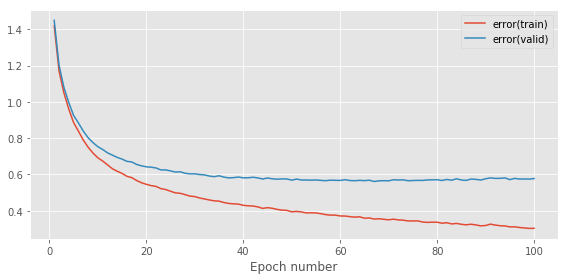

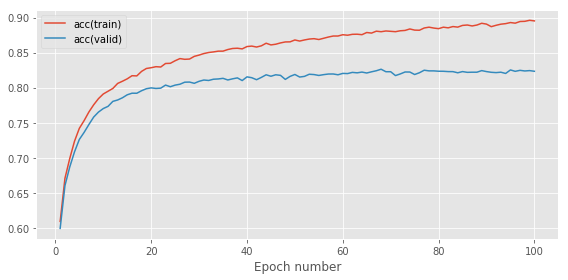

In [7]:
############# Adam BaseLine with no restart scheduler

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 1e-4
learning_ranges = [1.05]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

for learning_range in learning_ranges:
    

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    adam_scheduler_no_restart = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=100,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=1.0)

    error = CrossEntropySoftmaxError() 

    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,scheduler=adam_scheduler_no_restart,fileName='cw4_3_adam_no_restart_{}'.format(learning_rate))

learning_rate 0.000105
epoch 1


Epoch 1: 4.4s to complete
    error(train)=1.45e+00, acc(train)=6.02e-01, error(valid)=1.47e+00, acc(valid)=5.90e-01


learning_rate 0.00010496151223260639
epoch 2


Epoch 2: 4.3s to complete
    error(train)=1.19e+00, acc(train)=6.65e-01, error(valid)=1.22e+00, acc(valid)=6.53e-01


learning_rate 0.0001048466559055088
epoch 3


Epoch 3: 4.3s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.09e+00, acc(valid)=6.89e-01


learning_rate 0.00010465724237159743
epoch 4


Epoch 4: 4.3s to complete
    error(train)=9.64e-01, acc(train)=7.22e-01, error(valid)=1.01e+00, acc(valid)=7.11e-01


learning_rate 0.0001043962587954522
epoch 5


Epoch 5: 4.4s to complete
    error(train)=8.94e-01, acc(train)=7.40e-01, error(valid)=9.42e-01, acc(valid)=7.25e-01


learning_rate 0.00010406782104397297
epoch 6


Epoch 6: 4.3s to complete
    error(train)=8.39e-01, acc(train)=7.52e-01, error(valid)=8.89e-01, acc(valid)=7.36e-01


learning_rate 0.00010367710877669976
epoch 7


Epoch 7: 4.4s to complete
    error(train)=7.94e-01, acc(train)=7.64e-01, error(valid)=8.51e-01, acc(valid)=7.50e-01


learning_rate 0.00010323028375948765
epoch 8


Epoch 8: 4.5s to complete
    error(train)=7.57e-01, acc(train)=7.74e-01, error(valid)=8.18e-01, acc(valid)=7.54e-01


learning_rate 0.00010273439268977844
epoch 9


Epoch 9: 4.5s to complete
    error(train)=7.23e-01, acc(train)=7.83e-01, error(valid)=7.89e-01, acc(valid)=7.63e-01


learning_rate 0.00010219725606597238
epoch 10


Epoch 10: 4.4s to complete
    error(train)=6.99e-01, acc(train)=7.87e-01, error(valid)=7.70e-01, acc(valid)=7.66e-01


learning_rate 0.00010162734485349677
epoch 11


Epoch 11: 4.5s to complete
    error(train)=6.75e-01, acc(train)=7.92e-01, error(valid)=7.48e-01, acc(valid)=7.67e-01


learning_rate 0.0001010336468926208
epoch 12


Epoch 12: 4.5s to complete
    error(train)=6.60e-01, acc(train)=7.97e-01, error(valid)=7.35e-01, acc(valid)=7.75e-01


learning_rate 0.00010042552515484546
epoch 13


Epoch 13: 4.4s to complete
    error(train)=6.37e-01, acc(train)=8.04e-01, error(valid)=7.14e-01, acc(valid)=7.81e-01


learning_rate 9.981257008324978e-05
epoch 14


Epoch 14: 4.5s to complete
    error(train)=6.24e-01, acc(train)=8.07e-01, error(valid)=7.07e-01, acc(valid)=7.86e-01


learning_rate 9.920444834547444e-05
epoch 15


Epoch 15: 4.5s to complete
    error(train)=6.06e-01, acc(train)=8.13e-01, error(valid)=6.92e-01, acc(valid)=7.88e-01


learning_rate 9.861075038459847e-05
epoch 16


Epoch 16: 4.5s to complete
    error(train)=5.97e-01, acc(train)=8.14e-01, error(valid)=6.83e-01, acc(valid)=7.87e-01


learning_rate 9.804083917212287e-05
epoch 17


Epoch 17: 4.4s to complete
    error(train)=5.82e-01, acc(train)=8.18e-01, error(valid)=6.72e-01, acc(valid)=7.92e-01


learning_rate 9.750370254831681e-05
epoch 18


Epoch 18: 4.4s to complete
    error(train)=5.67e-01, acc(train)=8.21e-01, error(valid)=6.57e-01, acc(valid)=7.93e-01


learning_rate 9.700781147860759e-05
epoch 19


Epoch 19: 4.3s to complete
    error(train)=5.61e-01, acc(train)=8.23e-01, error(valid)=6.59e-01, acc(valid)=7.94e-01


learning_rate 9.656098646139549e-05
epoch 20


Epoch 20: 4.3s to complete
    error(train)=5.49e-01, acc(train)=8.27e-01, error(valid)=6.46e-01, acc(valid)=7.97e-01


learning_rate 9.617027419412228e-05
epoch 21


Epoch 21: 4.3s to complete
    error(train)=5.40e-01, acc(train)=8.29e-01, error(valid)=6.42e-01, acc(valid)=7.98e-01


learning_rate 9.584183644264305e-05
epoch 22


Epoch 22: 4.3s to complete
    error(train)=5.36e-01, acc(train)=8.29e-01, error(valid)=6.43e-01, acc(valid)=7.98e-01


learning_rate 9.558085286649782e-05
epoch 23


Epoch 23: 4.3s to complete
    error(train)=5.26e-01, acc(train)=8.32e-01, error(valid)=6.31e-01, acc(valid)=8.02e-01


learning_rate 9.539143933258645e-05
epoch 24


Epoch 24: 4.4s to complete
    error(train)=5.19e-01, acc(train)=8.34e-01, error(valid)=6.23e-01, acc(valid)=8.02e-01


learning_rate 9.527658300548886e-05
epoch 25


Epoch 25: 4.5s to complete
    error(train)=5.12e-01, acc(train)=8.36e-01, error(valid)=6.23e-01, acc(valid)=8.01e-01


learning_rate 9.45e-05
epoch 26


Epoch 26: 4.5s to complete
    error(train)=5.00e-01, acc(train)=8.41e-01, error(valid)=6.14e-01, acc(valid)=8.04e-01


learning_rate 9.450032371746353e-05
epoch 27


Epoch 27: 4.5s to complete
    error(train)=5.00e-01, acc(train)=8.40e-01, error(valid)=6.15e-01, acc(valid)=8.05e-01


learning_rate 9.450129430194364e-05
epoch 28


Epoch 28: 4.6s to complete
    error(train)=4.93e-01, acc(train)=8.40e-01, error(valid)=6.11e-01, acc(valid)=8.04e-01


learning_rate 9.450291005070538e-05
epoch 29


Epoch 29: 4.6s to complete
    error(train)=4.84e-01, acc(train)=8.44e-01, error(valid)=6.02e-01, acc(valid)=8.09e-01


learning_rate 9.450516812917637e-05
epoch 30


Epoch 30: 4.6s to complete
    error(train)=4.80e-01, acc(train)=8.45e-01, error(valid)=6.01e-01, acc(valid)=8.09e-01


learning_rate 9.450806457591967e-05
epoch 31


Epoch 31: 4.5s to complete
    error(train)=4.77e-01, acc(train)=8.44e-01, error(valid)=5.99e-01, acc(valid)=8.09e-01


learning_rate 9.451159430958348e-05
epoch 32


Epoch 32: 4.7s to complete
    error(train)=4.74e-01, acc(train)=8.46e-01, error(valid)=5.97e-01, acc(valid)=8.10e-01


learning_rate 9.451575113781555e-05
epoch 33


Epoch 33: 4.8s to complete
    error(train)=4.67e-01, acc(train)=8.48e-01, error(valid)=5.95e-01, acc(valid)=8.08e-01


learning_rate 9.452052776812666e-05
epoch 34


Epoch 34: 4.8s to complete
    error(train)=4.62e-01, acc(train)=8.50e-01, error(valid)=5.94e-01, acc(valid)=8.09e-01


learning_rate 9.452591582068411e-05
epoch 35


Epoch 35: 4.8s to complete
    error(train)=4.54e-01, acc(train)=8.52e-01, error(valid)=5.87e-01, acc(valid)=8.12e-01


learning_rate 9.453190584301286e-05
epoch 36


Epoch 36: 4.9s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=5.86e-01, acc(valid)=8.11e-01


learning_rate 9.453848732657832e-05
epoch 37


Epoch 37: 5.1s to complete
    error(train)=4.52e-01, acc(train)=8.52e-01, error(valid)=5.88e-01, acc(valid)=8.12e-01


learning_rate 9.454564872522191e-05
epoch 38


Epoch 38: 4.9s to complete
    error(train)=4.46e-01, acc(train)=8.53e-01, error(valid)=5.82e-01, acc(valid)=8.12e-01


learning_rate 9.455337747541696e-05
epoch 39


Epoch 39: 4.5s to complete
    error(train)=4.42e-01, acc(train)=8.56e-01, error(valid)=5.85e-01, acc(valid)=8.14e-01


learning_rate 9.456166001830938e-05
epoch 40


Epoch 40: 4.5s to complete
    error(train)=4.43e-01, acc(train)=8.53e-01, error(valid)=5.86e-01, acc(valid)=8.14e-01


learning_rate 9.457048182350449e-05
epoch 41


Epoch 41: 4.3s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=5.79e-01, acc(valid)=8.16e-01


learning_rate 9.457982741455833e-05
epoch 42


Epoch 42: 4.4s to complete
    error(train)=4.26e-01, acc(train)=8.60e-01, error(valid)=5.72e-01, acc(valid)=8.18e-01


learning_rate 9.458968039612853e-05
epoch 43


Epoch 43: 4.4s to complete
    error(train)=4.25e-01, acc(train)=8.60e-01, error(valid)=5.75e-01, acc(valid)=8.16e-01


learning_rate 9.460002348273734e-05
epoch 44


Epoch 44: 4.4s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.72e-01, acc(valid)=8.17e-01


learning_rate 9.461083852909626e-05
epoch 45


Epoch 45: 4.8s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


learning_rate 9.4622106561939e-05
epoch 46


Epoch 46: 5.1s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.71e-01, acc(valid)=8.17e-01


learning_rate 9.463380781330704e-05
epoch 47


Epoch 47: 4.8s to complete
    error(train)=4.12e-01, acc(train)=8.63e-01, error(valid)=5.69e-01, acc(valid)=8.18e-01


learning_rate 9.464592175522937e-05
epoch 48


Epoch 48: 4.6s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.67e-01, acc(valid)=8.18e-01


learning_rate 9.465842713573551e-05
epoch 49


Epoch 49: 4.6s to complete
    error(train)=4.08e-01, acc(train)=8.65e-01, error(valid)=5.69e-01, acc(valid)=8.17e-01


learning_rate 9.46713020161387e-05
epoch 50


Epoch 50: 4.6s to complete
    error(train)=4.06e-01, acc(train)=8.65e-01, error(valid)=5.70e-01, acc(valid)=8.19e-01


learning_rate 9.468452380952382e-05
epoch 51


Epoch 51: 4.5s to complete
    error(train)=4.00e-01, acc(train)=8.67e-01, error(valid)=5.63e-01, acc(valid)=8.22e-01


learning_rate 9.469806932037243e-05
epoch 52


Epoch 52: 4.5s to complete
    error(train)=3.97e-01, acc(train)=8.67e-01, error(valid)=5.64e-01, acc(valid)=8.21e-01


learning_rate 9.471191478525575e-05
epoch 53


Epoch 53: 4.5s to complete
    error(train)=3.92e-01, acc(train)=8.70e-01, error(valid)=5.63e-01, acc(valid)=8.21e-01


learning_rate 9.472603591452363e-05
epoch 54


Epoch 54: 4.6s to complete
    error(train)=4.00e-01, acc(train)=8.64e-01, error(valid)=5.71e-01, acc(valid)=8.13e-01


learning_rate 9.474040793491696e-05
epoch 55


Epoch 55: 4.8s to complete
    error(train)=3.93e-01, acc(train)=8.68e-01, error(valid)=5.69e-01, acc(valid)=8.16e-01


learning_rate 9.47550056330283e-05
epoch 56


Epoch 56: 4.6s to complete
    error(train)=3.90e-01, acc(train)=8.68e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


learning_rate 9.476980339953485e-05
epoch 57


Epoch 57: 4.6s to complete
    error(train)=3.84e-01, acc(train)=8.71e-01, error(valid)=5.63e-01, acc(valid)=8.20e-01


learning_rate 9.478477527412584e-05
epoch 58


Epoch 58: 4.7s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=5.66e-01, acc(valid)=8.21e-01


learning_rate 9.479989499104575e-05
epoch 59


Epoch 59: 4.6s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


learning_rate 9.48151360251734e-05
epoch 60


Epoch 60: 4.7s to complete
    error(train)=3.79e-01, acc(train)=8.71e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


learning_rate 9.4830471638556e-05
epoch 61


Epoch 61: 4.6s to complete
    error(train)=3.75e-01, acc(train)=8.74e-01, error(valid)=5.61e-01, acc(valid)=8.19e-01


learning_rate 9.484587492731657e-05
epoch 62


Epoch 62: 4.6s to complete
    error(train)=3.74e-01, acc(train)=8.74e-01, error(valid)=5.59e-01, acc(valid)=8.21e-01


learning_rate 9.486131886885257e-05
epoch 63


Epoch 63: 4.5s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.66e-01, acc(valid)=8.18e-01


learning_rate 9.487677636924268e-05
epoch 64


Epoch 64: 4.6s to complete
    error(train)=3.65e-01, acc(train)=8.77e-01, error(valid)=5.57e-01, acc(valid)=8.21e-01


learning_rate 9.489222031077868e-05
epoch 65


Epoch 65: 4.5s to complete
    error(train)=3.64e-01, acc(train)=8.78e-01, error(valid)=5.59e-01, acc(valid)=8.22e-01


learning_rate 9.490762359953925e-05
epoch 66


Epoch 66: 4.7s to complete
    error(train)=3.65e-01, acc(train)=8.76e-01, error(valid)=5.61e-01, acc(valid)=8.22e-01


learning_rate 9.492295921292184e-05
epoch 67


Epoch 67: 4.6s to complete
    error(train)=3.62e-01, acc(train)=8.78e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


learning_rate 9.49382002470495e-05
epoch 68


Epoch 68: 4.7s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


learning_rate 9.49533199639694e-05
epoch 69


Epoch 69: 4.8s to complete
    error(train)=3.62e-01, acc(train)=8.77e-01, error(valid)=5.63e-01, acc(valid)=8.24e-01


learning_rate 9.49682918385604e-05
epoch 70


Epoch 70: 4.7s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


learning_rate 9.498308960506695e-05
epoch 71


Epoch 71: 4.7s to complete
    error(train)=3.55e-01, acc(train)=8.81e-01, error(valid)=5.61e-01, acc(valid)=8.23e-01


learning_rate 9.499768730317829e-05
epoch 72


Epoch 72: 4.7s to complete
    error(train)=3.53e-01, acc(train)=8.80e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


learning_rate 9.501205932357161e-05
epoch 73


Epoch 73: 4.7s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=5.59e-01, acc(valid)=8.22e-01


learning_rate 9.50261804528395e-05
epoch 74


Epoch 74: 4.7s to complete
    error(train)=3.46e-01, acc(train)=8.83e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


learning_rate 9.504002591772281e-05
epoch 75


Epoch 75: 4.8s to complete
    error(train)=3.44e-01, acc(train)=8.83e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


learning_rate 9.505357142857143e-05
epoch 76


Epoch 76: 4.7s to complete
    error(train)=3.47e-01, acc(train)=8.81e-01, error(valid)=5.63e-01, acc(valid)=8.20e-01


learning_rate 9.506679322195654e-05
epoch 77


Epoch 77: 4.7s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=5.65e-01, acc(valid)=8.21e-01


learning_rate 9.507966810235973e-05
epoch 78


Epoch 78: 4.7s to complete
    error(train)=3.37e-01, acc(train)=8.86e-01, error(valid)=5.56e-01, acc(valid)=8.25e-01


learning_rate 9.509217348286588e-05
epoch 79


Epoch 79: 4.7s to complete
    error(train)=3.44e-01, acc(train)=8.81e-01, error(valid)=5.68e-01, acc(valid)=8.22e-01


learning_rate 9.510428742478821e-05
epoch 80


Epoch 80: 4.6s to complete
    error(train)=3.35e-01, acc(train)=8.86e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


learning_rate 9.511598867615624e-05
epoch 81


Epoch 81: 4.6s to complete
    error(train)=3.37e-01, acc(train)=8.83e-01, error(valid)=5.62e-01, acc(valid)=8.23e-01


learning_rate 9.512725670899899e-05
epoch 82


Epoch 82: 4.6s to complete
    error(train)=3.34e-01, acc(train)=8.86e-01, error(valid)=5.62e-01, acc(valid)=8.25e-01


learning_rate 9.51380717553579e-05
epoch 83


Epoch 83: 4.6s to complete
    error(train)=3.31e-01, acc(train)=8.87e-01, error(valid)=5.62e-01, acc(valid)=8.23e-01


learning_rate 9.514841484196672e-05
epoch 84


Epoch 84: 4.6s to complete
    error(train)=3.33e-01, acc(train)=8.86e-01, error(valid)=5.65e-01, acc(valid)=8.24e-01


learning_rate 9.515826782353692e-05
epoch 85


Epoch 85: 4.6s to complete
    error(train)=3.32e-01, acc(train)=8.87e-01, error(valid)=5.68e-01, acc(valid)=8.23e-01


learning_rate 9.516761341459076e-05
epoch 86


Epoch 86: 4.6s to complete
    error(train)=3.28e-01, acc(train)=8.88e-01, error(valid)=5.66e-01, acc(valid)=8.23e-01


learning_rate 9.517643521978587e-05
epoch 87


Epoch 87: 4.6s to complete
    error(train)=3.28e-01, acc(train)=8.87e-01, error(valid)=5.68e-01, acc(valid)=8.21e-01


learning_rate 9.518471776267829e-05
epoch 88


Epoch 88: 4.6s to complete
    error(train)=3.23e-01, acc(train)=8.89e-01, error(valid)=5.65e-01, acc(valid)=8.20e-01


learning_rate 9.519244651287334e-05
epoch 89


Epoch 89: 4.6s to complete
    error(train)=3.23e-01, acc(train)=8.89e-01, error(valid)=5.68e-01, acc(valid)=8.21e-01


learning_rate 9.519960791151692e-05
epoch 90


Epoch 90: 4.6s to complete
    error(train)=3.19e-01, acc(train)=8.91e-01, error(valid)=5.67e-01, acc(valid)=8.23e-01


learning_rate 9.520618939508239e-05
epoch 91


Epoch 91: 4.6s to complete
    error(train)=3.17e-01, acc(train)=8.92e-01, error(valid)=5.65e-01, acc(valid)=8.25e-01


learning_rate 9.521217941741114e-05
epoch 92


Epoch 92: 4.6s to complete
    error(train)=3.18e-01, acc(train)=8.91e-01, error(valid)=5.65e-01, acc(valid)=8.23e-01


learning_rate 9.521756746996859e-05
epoch 93


Epoch 93: 4.5s to complete
    error(train)=3.19e-01, acc(train)=8.89e-01, error(valid)=5.68e-01, acc(valid)=8.23e-01


learning_rate 9.52223441002797e-05
epoch 94


Epoch 94: 4.6s to complete
    error(train)=3.16e-01, acc(train)=8.90e-01, error(valid)=5.69e-01, acc(valid)=8.21e-01


learning_rate 9.522650092851176e-05
epoch 95


Epoch 95: 4.8s to complete
    error(train)=3.12e-01, acc(train)=8.92e-01, error(valid)=5.67e-01, acc(valid)=8.23e-01


learning_rate 9.523003066217558e-05
epoch 96


Epoch 96: 5.1s to complete
    error(train)=3.13e-01, acc(train)=8.92e-01, error(valid)=5.70e-01, acc(valid)=8.23e-01


learning_rate 9.523292710891888e-05
epoch 97


Epoch 97: 5.3s to complete
    error(train)=3.10e-01, acc(train)=8.93e-01, error(valid)=5.69e-01, acc(valid)=8.24e-01


learning_rate 9.523518518738987e-05
epoch 98


Epoch 98: 4.6s to complete
    error(train)=3.08e-01, acc(train)=8.94e-01, error(valid)=5.69e-01, acc(valid)=8.23e-01


learning_rate 9.523680093615161e-05
epoch 99


Epoch 99: 4.6s to complete
    error(train)=3.07e-01, acc(train)=8.95e-01, error(valid)=5.70e-01, acc(valid)=8.24e-01


learning_rate 9.523777152063172e-05
epoch 100


Epoch 100: 4.7s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=5.71e-01, acc(valid)=8.24e-01


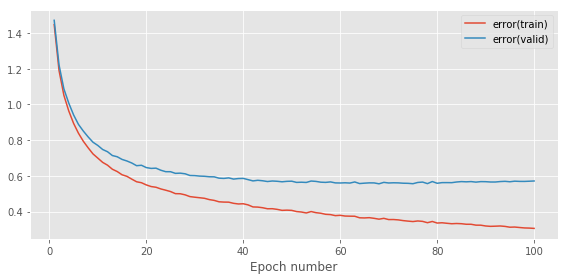

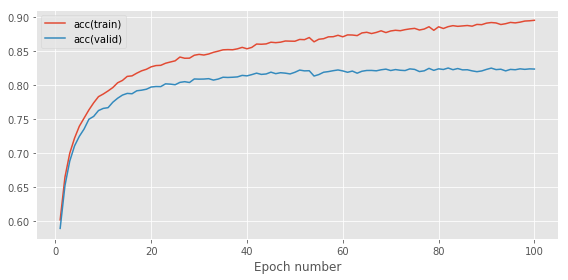

In [8]:
############## Adam With scheduler with warm restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 1e-4
learning_range = 1.05
# learning_ranges = [1.05]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

adam_scheduler_warm = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=25,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3.0)

error = CrossEntropySoftmaxError() 

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, test_data, num_epochs, stats_interval, notebook=True,scheduler=adam_scheduler_warm,fileName='cw4_3_adam_special_restart_{}'.format(learning_rate))